In [3]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer import EM


true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.01123988 0.01207819 0.01155182 0.02688619 0.
 0.01019029 0.         0.         0.        ]


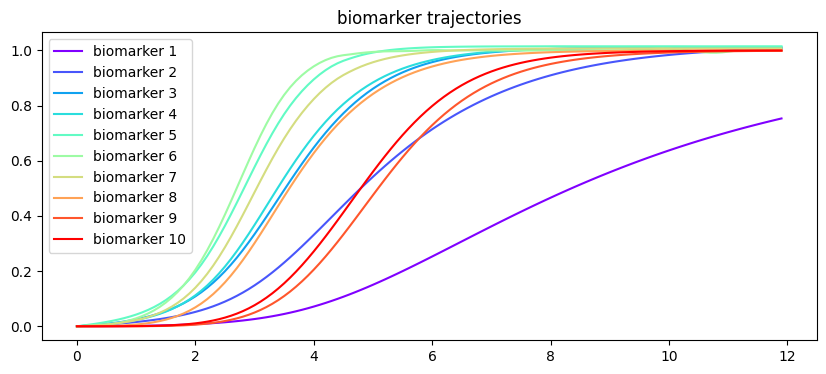

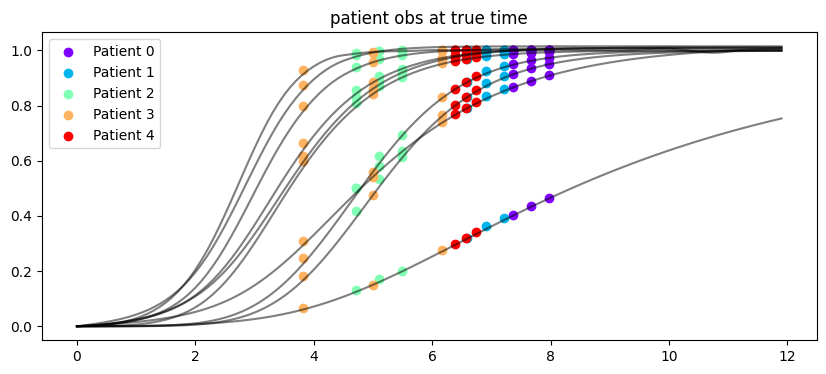

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [02:07<00:11, 11.60s/it]


SUMMARY:
best LSE at iteration 11: 7.924023854245716
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00349737 0.02883756
 0.05388308 0.05294193 0.10593068 0.06989099 0.0584828  0.02374438
 0.0035763  0.00577992 1.0097509  1.01673605 1.00680739 1.00664779
 1.00331087 0.99808216 1.00332352 1.00147643 1.00245904 1.00182448
 1.0171369 ]
final theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00349737 0.02883756
 0.05388308 0.05294193 0.10593068 0.06989099 0.0584828  0.02374438
 0.0035763  0.00577992 1.0097509  

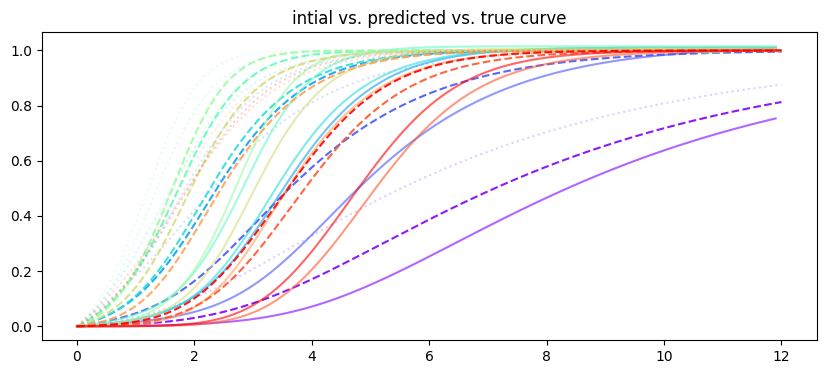

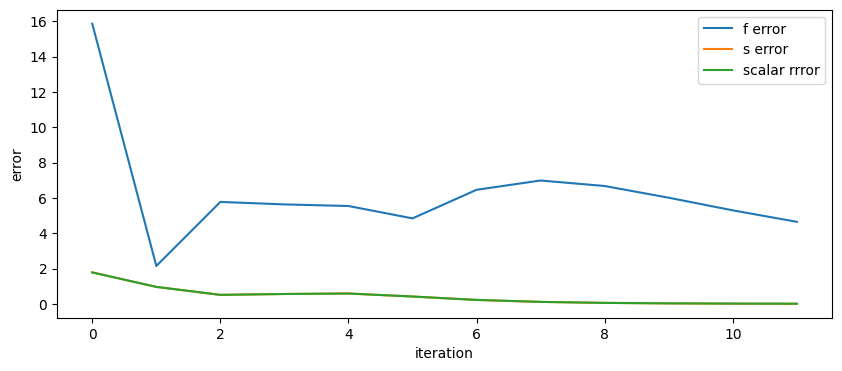

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


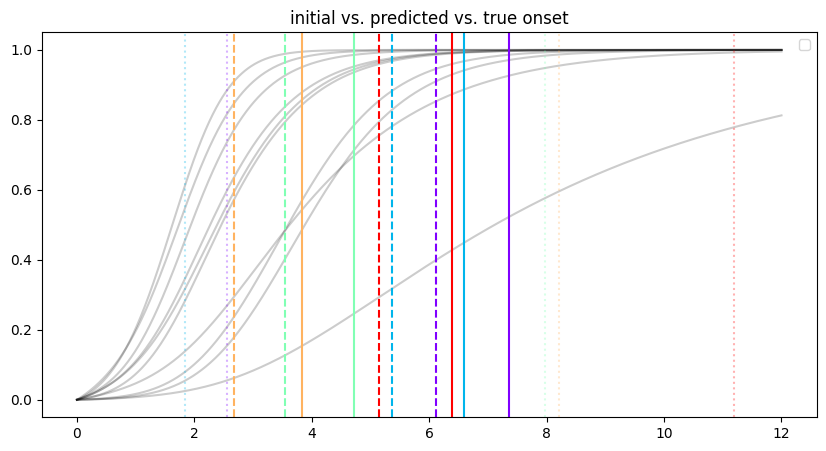

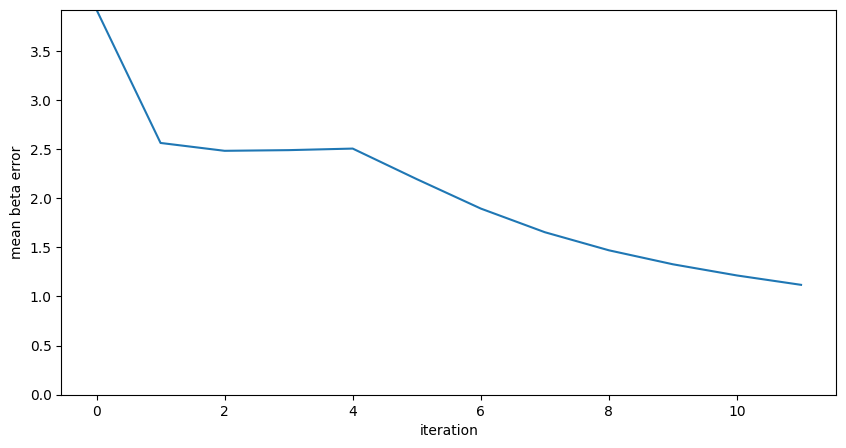

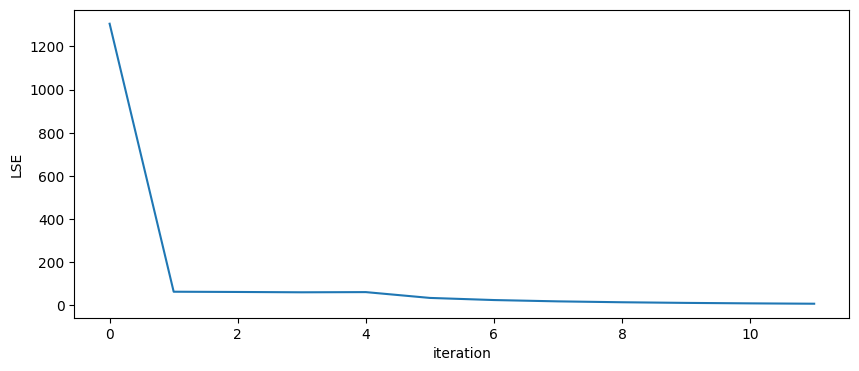

In [4]:
# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K, x0, f, scalar_K  = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=0.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 0.01

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [02:14<00:12, 12.27s/it]


SUMMARY:
best LSE at iteration 11: 14.523216624639765
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00489421 0.0228048
 0.03767708 0.03878733 0.0798844  0.0348571  0.04227765 0.01626812
 0.00137681 0.00238331 0.92191147 0.99712234 1.00426722 1.00408378
 1.00406084 0.99969219 1.00301196 0.99799077 0.9889657  0.9923113
 0.96728706]
final theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00489421 0.0228048
 0.03767708 0.03878733 0.0798844  0.0348571  0.04227765 0.01626812
 0.00137681 0.00238331 0.92191147 0.

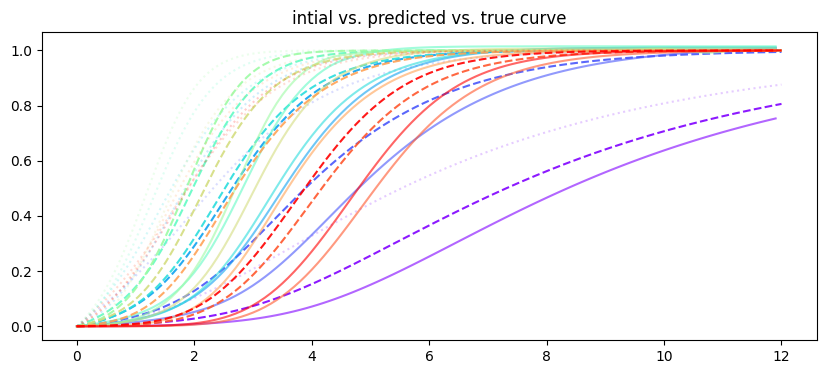

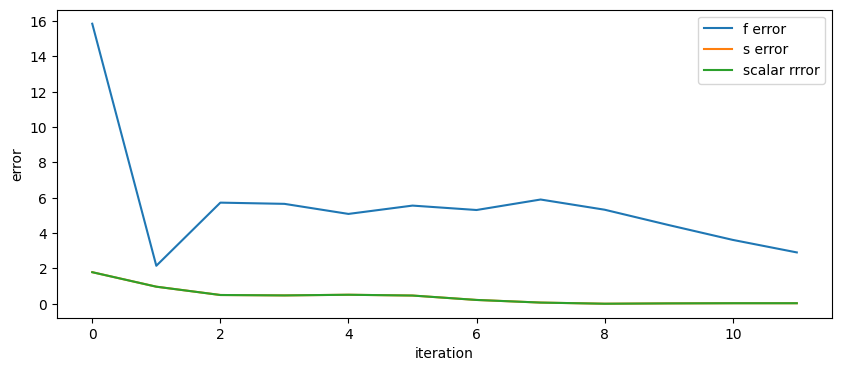

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


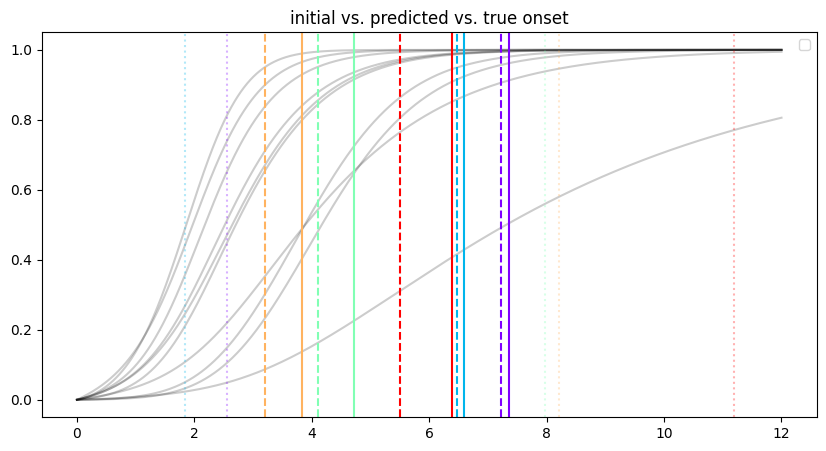

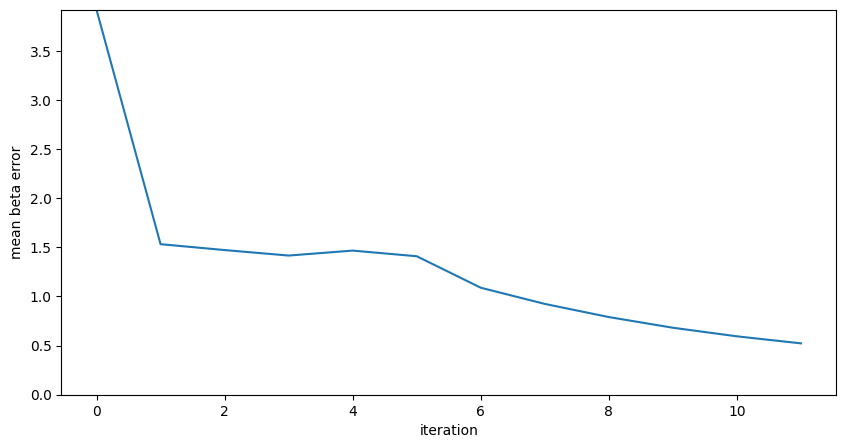

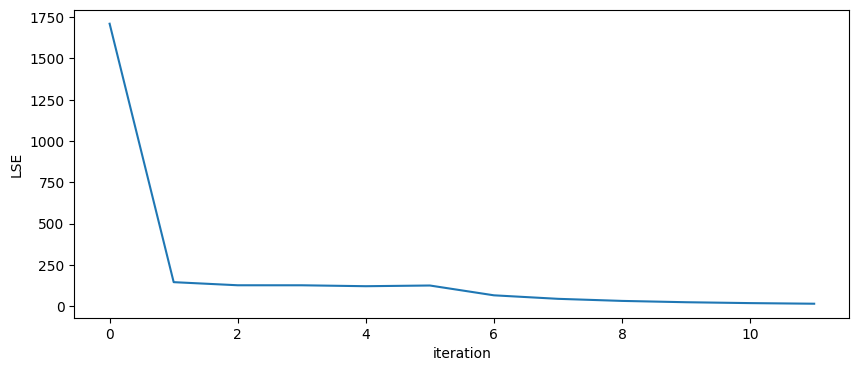

In [5]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=0.01,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 0.1

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [02:26<00:13, 13.34s/it]


SUMMARY:
best LSE at iteration 11: 19.437545583392332
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.66060827e-03 1.14734642e-02
 1.55933622e-02 1.48163122e-02 3.40483609e-02 2.82433680e-04
 1.38965679e-02 1.88014577e-03 1.13189005e-04 5.93731275e-05
 1.00116337e+00 1.01793102e+00 1.00557660e+00 1.00516552e+00
 1.00376256e+00 9.98749451e-01 1.00220219e+00 9.98355569e-01
 9.98525377e-01 9.98041085e-01 9.66781904e-01]
final theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 

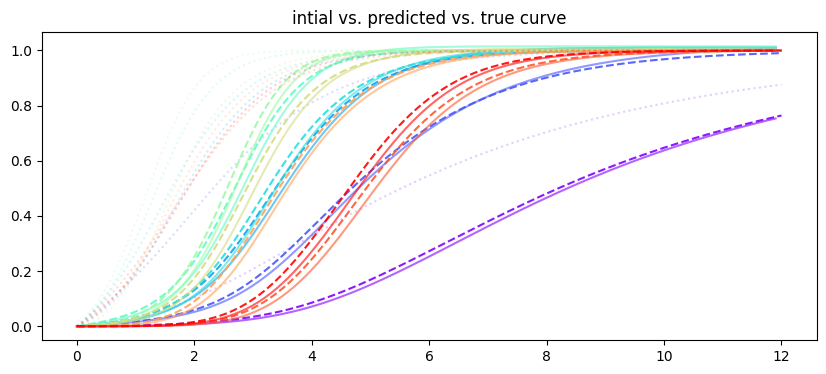

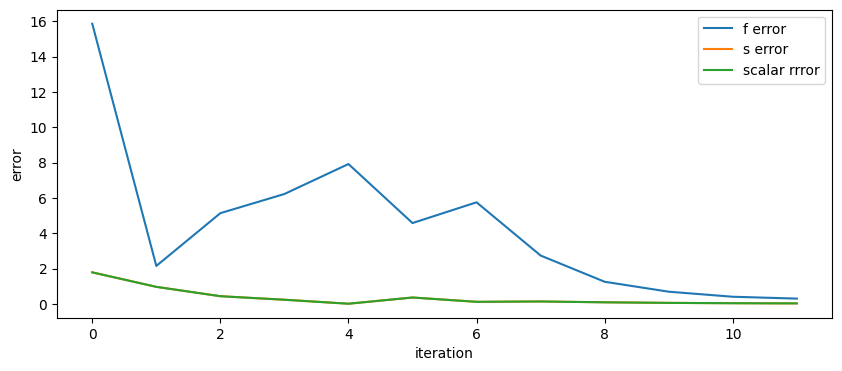

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


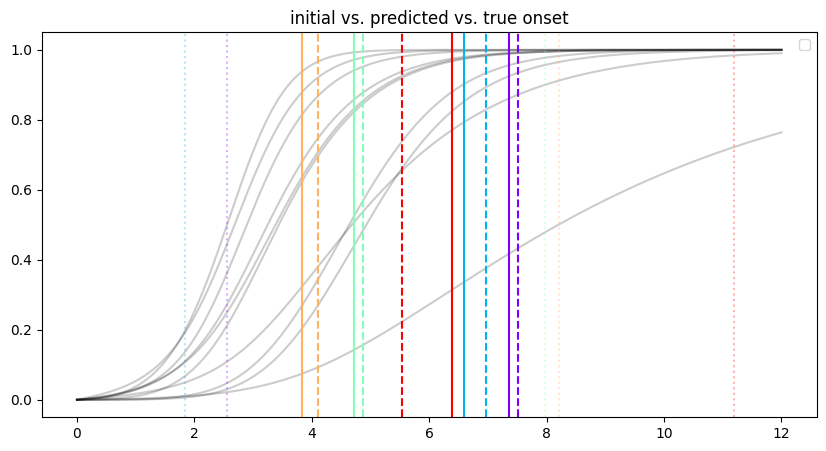

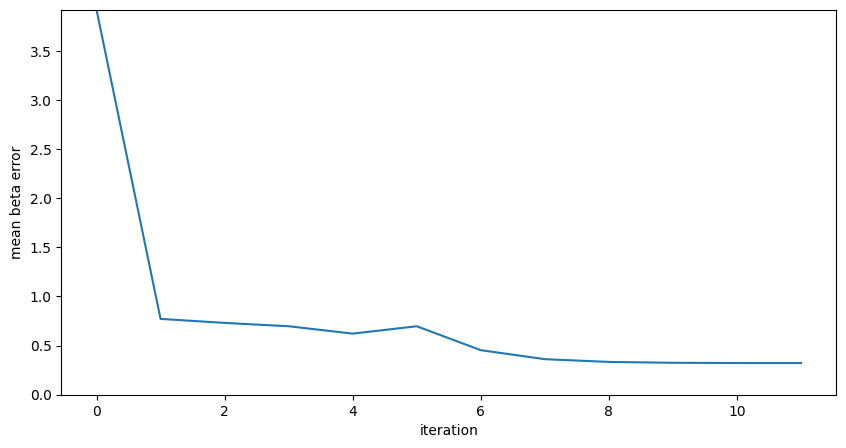

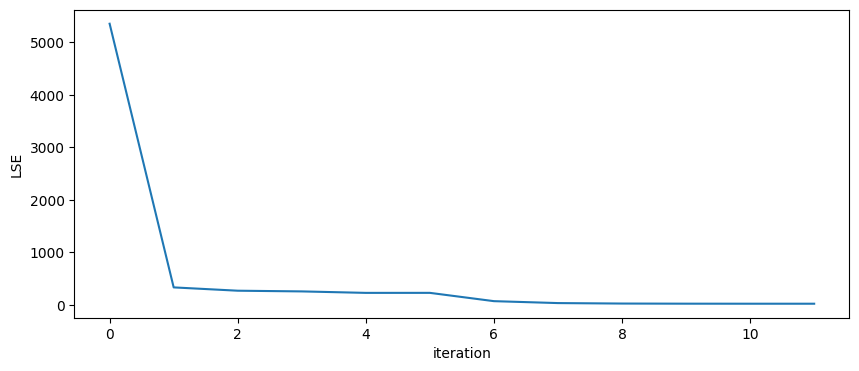

In [6]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=0.1,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 1.0

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [03:13<00:17, 17.59s/it]


SUMMARY:
best LSE at iteration 8: 41.610482358072545
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.74211225e-03 1.36304938e-02
 1.95816260e-02 1.85482224e-02 3.44208129e-02 5.05209633e-05
 1.70274127e-02 5.94830963e-03 6.71450056e-04 8.21886077e-04
 1.02933139e+00 1.02518056e+00 1.00636826e+00 1.00593563e+00
 1.00309369e+00 9.96883305e-01 1.00224377e+00 9.99822446e-01
 1.00158437e+00 9.99588052e-01 9.24453099e-01]
final theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0

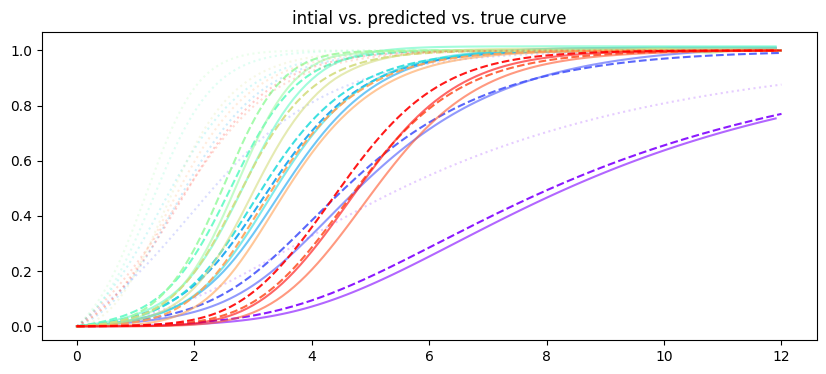

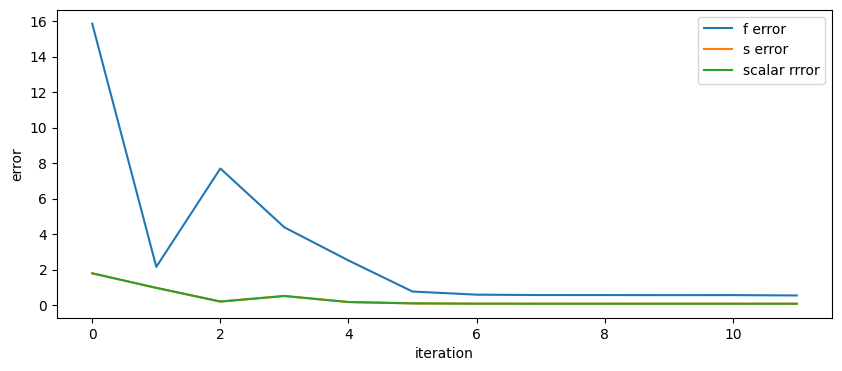

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


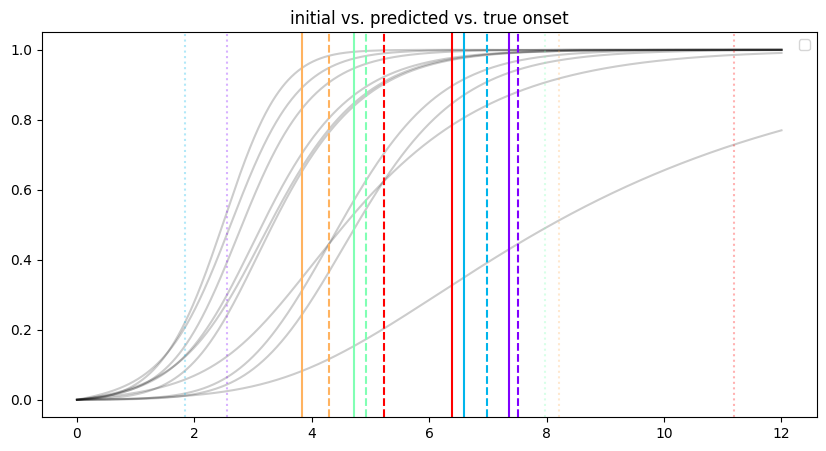

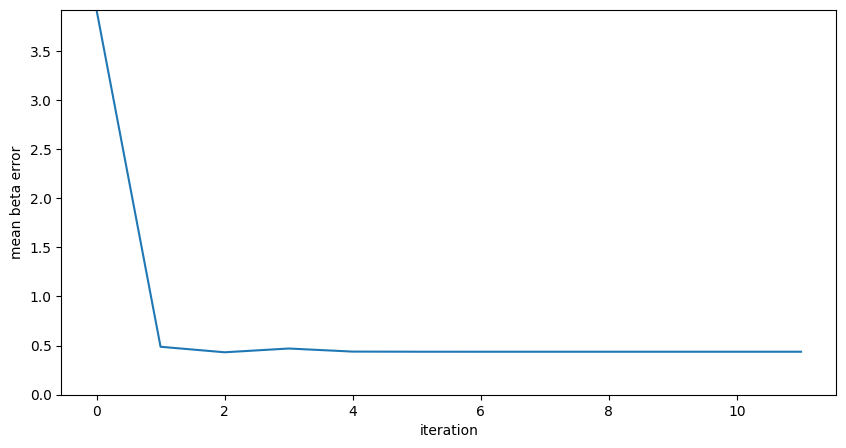

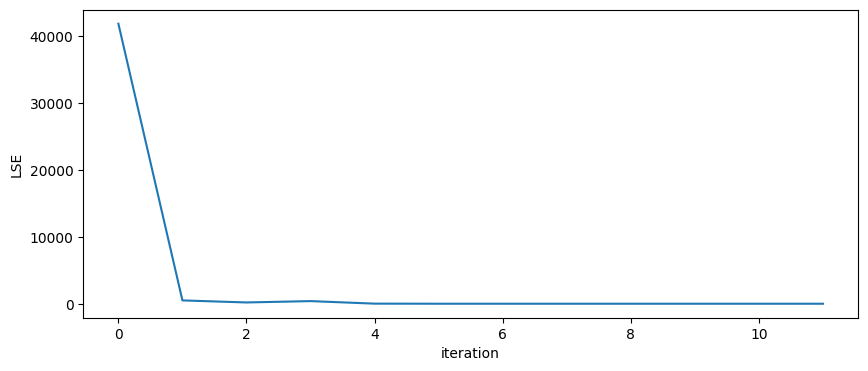

In [7]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=1.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 1.0

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [02:44<00:14, 14.92s/it]


SUMMARY:
best LSE at iteration 8: 132.591588088246
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.80748275e-03 1.40074071e-02
 2.07133589e-02 1.92066244e-02 3.71429279e-02 2.80834806e-04
 1.75311257e-02 7.40823227e-03 6.59794281e-04 1.43388252e-03
 1.04501827e+00 1.02922818e+00 1.00735804e+00 1.00718146e+00
 1.00241672e+00 9.96258253e-01 1.00245339e+00 1.00001094e+00
 1.00304748e+00 9.99486803e-01 9.08714501e-01]
final theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0

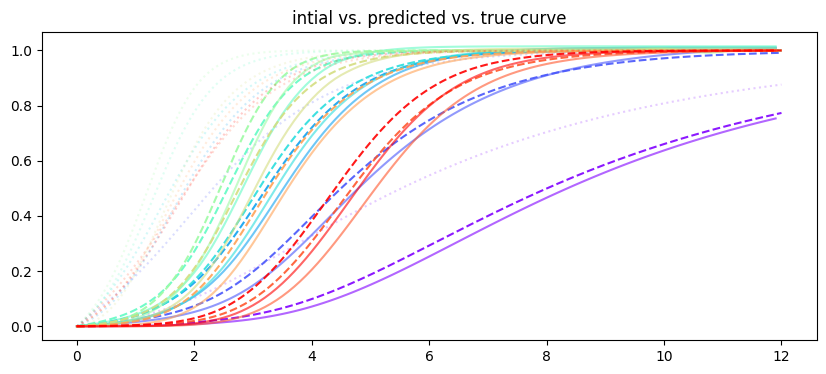

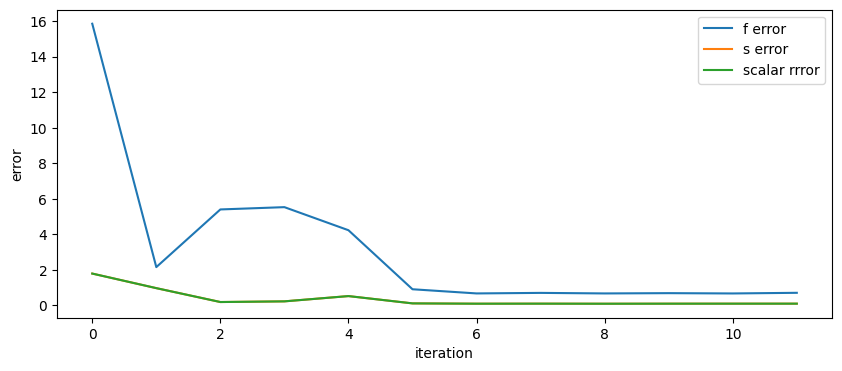

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


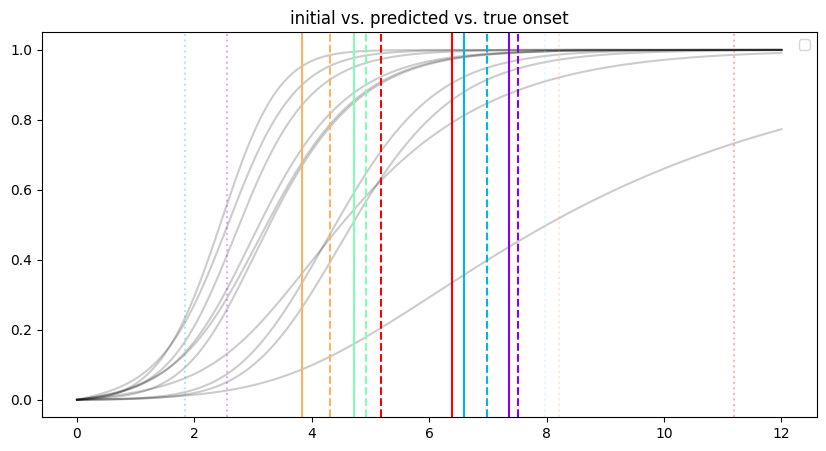

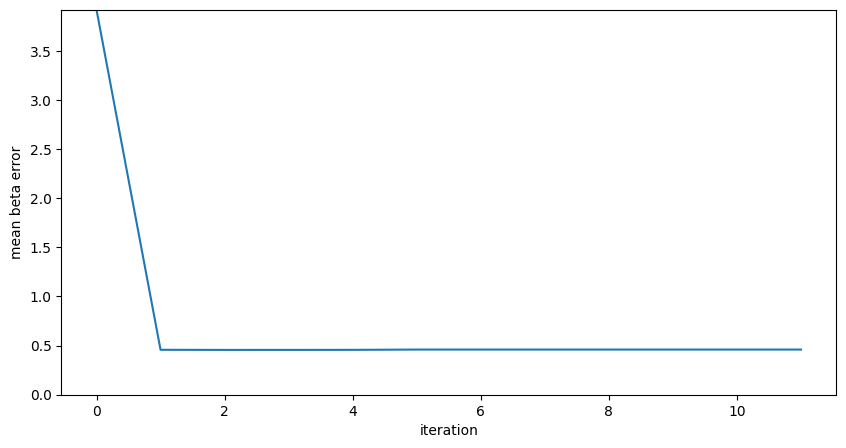

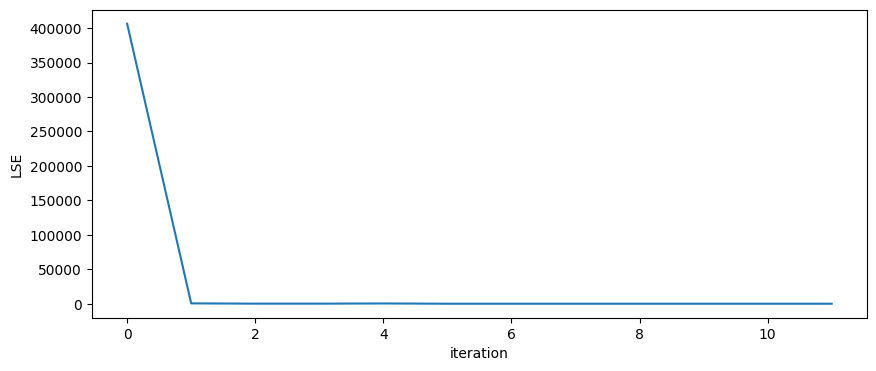

In [8]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              lambda_cog=10.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)
